In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx
import seaborn as sns


In [2]:
df = pd.read_csv('base/Crime_Data_Treated.csv')
df = df[['LAT', 'LON']]
df

,LAT,LON
0,34.0141,-118.2978
1,34.0459,-118.2545
2,34.1685,-118.4019
3,34.2198,-118.4468
4,34.0452,-118.2534
...,...,...
569108,34.1667,-118.3643
569109,34.2466,-118.4054
569110,34.2790,-118.4116
569111,33.9841,-118.2915


In [3]:
df = df[df['LAT'] != 0]
df = df.head(20000)

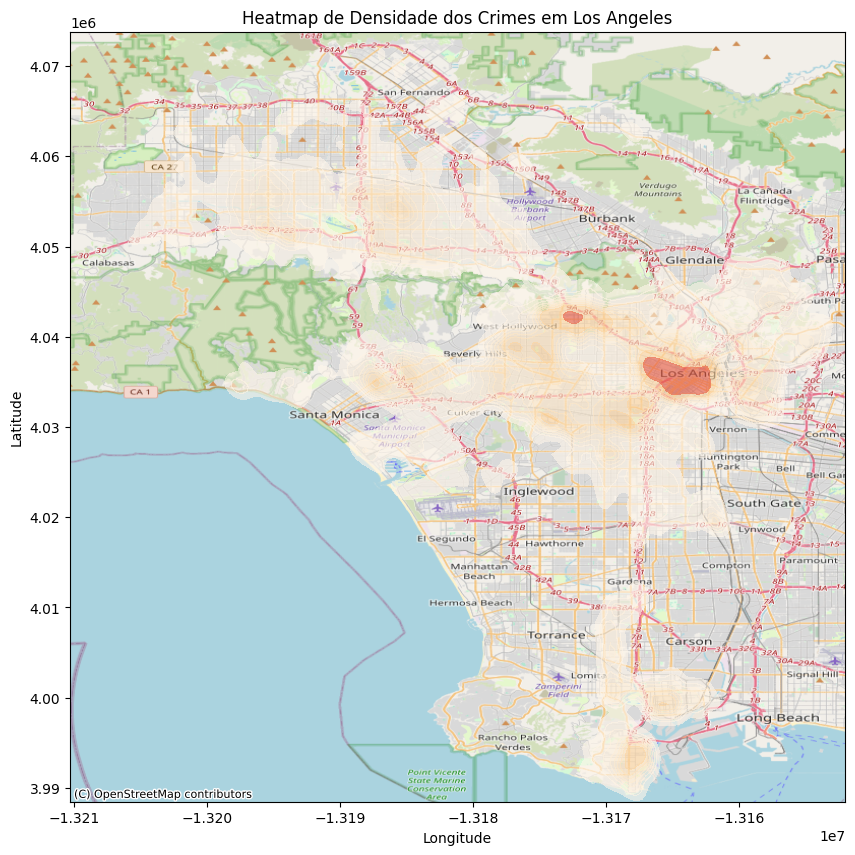

In [4]:
# Criar um GeoDataFrame com pontos de Los Angeles
df = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['LON'], df['LAT'], crs="EPSG:4326")
)

# Converter o CRS para Web Mercator (EPSG:3857)
df = df.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(10, 10))
x = df.geometry.x
y = df.geometry.y

sns.kdeplot(x=x, y=y, ax=ax, fill=True, thresh=0.05, cmap="OrRd", alpha=0.6, bw_adjust=0.25)

# Adicionando um mapa de fundo com o OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Ajustar os limites do gráfico com buffer
buffer = 1000  
ax.set_xlim(df.geometry.x.min() - buffer, df.geometry.x.max() + buffer)
ax.set_ylim(df.geometry.y.min() - buffer, df.geometry.y.max() + buffer)

plt.title("Heatmap de Densidade dos Crimes em Los Angeles")
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()